In [12]:
import csv
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

with open('./admission.txt', 'r') as f:
    reader = csv.reader(f)
    X = []
    y = []
    for row in reader:
        x1, x2, lbl = float(row[0]), float(row[1]), float(row[2])
        X.append([x1, x2])
        y.append(lbl)
X = np.array(X)
y = np.array(y)
 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)



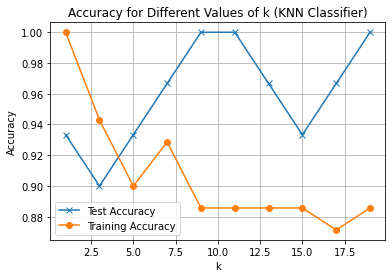

k=1 | Train Accuracy: 1.0000 | Test Accuracy: 0.9333
k=3 | Train Accuracy: 0.9429 | Test Accuracy: 0.9000
k=5 | Train Accuracy: 0.9000 | Test Accuracy: 0.9333
k=7 | Train Accuracy: 0.9286 | Test Accuracy: 0.9667
k=9 | Train Accuracy: 0.8857 | Test Accuracy: 1.0000
k=11 | Train Accuracy: 0.8857 | Test Accuracy: 1.0000
k=13 | Train Accuracy: 0.8857 | Test Accuracy: 0.9667
k=15 | Train Accuracy: 0.8857 | Test Accuracy: 0.9333
k=17 | Train Accuracy: 0.8714 | Test Accuracy: 0.9667
k=19 | Train Accuracy: 0.8857 | Test Accuracy: 1.0000


In [ ]:
def classify(X, y, example, k):
    '''
    :param X: zbiór (uczący) danych postaci ndarray (m, n), gdzie m to liczba przykładów, a n liczba cech
    :param y: zbiór wartości (labels) w postaci wektora ndarray (m, ). Każdy z elementów ma wartość 0 lub 1
    :param example: wektor cech danego przykładu postaci ndarray (n, )
    :param k: parametr k algorytmu knn
    :return: predykcja klasy przykładu. 0 lub 1
    '''
    # 1. iteruj po wszystkich przykładach ze zbioru uczącego - X
    #     a. dla każdego z przykładów oblicz dystans między aktualnie rozważanym przykładem uczącym a przykładem example, który jest poddany klasyfikacji
    #     b. zapisz w kolekcji parę (dystans, klasa przykładu uczącego)
    # 2. posortuj kolekcję względem dystansów, rosnąco
    # 3. wybierz k pierwszych elementów (k najkrótszych dystansów)
    # 4. klasa rozważanego przykładu example będzie taka jak większość wśród k przykładów z najkrótszym dystansem

    distances = []
    
    # 1. Obliczenie dystansu między przykładem testowym (example) a każdym przykładem uczącym
    for i in range(len(X)):
        dist = np.linalg.norm(X[i] - example)  # Dystans Euklidesowy
        distances.append((dist, y[i]))  # Zapisywanie dystansu i klasy

    # 2. Posortowanie listy według dystansów rosnąco
    distances.sort(key=lambda x: x[0])

    # 3. Wybór k najbliższych sąsiadów
    nearest_neighbors = distances[:k]
    
    # 4. Głosowanie: wybór klasy większościowej
    votes = [neighbor[1] for neighbor in nearest_neighbors]
    prediction = max(set(votes), key=votes.count)  # Zwrócenie klasy, która występuje najczęściej

    return prediction

train_accuracies = []
test_accuracies = []

for k in [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]:
    # Klasyfikacja na zbiorze uczącym
    y_train_pred = np.zeros(y_train.shape)
    for example_idx, example in enumerate(x_train):
        pred = classify(x_train, y_train, example, k)
        y_train_pred[example_idx] = pred
    
    # Klasyfikacja na zbiorze testowym
    y_test_pred = np.zeros(y_test.shape)
    for example_idx, example in enumerate(x_test):
        pred = classify(x_train, y_train, example, k)
        y_test_pred[example_idx] = pred

    # Obliczenie dokładności
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# 5. Wykres dokładności względem k
plt.plot([1, 3, 5, 7, 9, 11, 13, 15, 17, 19], test_accuracies, label='Test Accuracy', marker='x')
plt.plot([1, 3, 5, 7, 9, 11, 13, 15, 17, 19], train_accuracies, label='Training Accuracy', marker='o')

plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy for Different Values of k (KNN Classifier)')
plt.legend()
plt.grid(True)
plt.show()

# Wyświetlenie wyników
for k, test_acc, train_acc in zip([1, 3, 5, 7, 9, 11, 13, 15, 17, 19], test_accuracies, train_accuracies):
    print(f'k={k} | Train Accuracy: {train_acc:.4f} | Test Accuracy: {test_acc:.4f}')

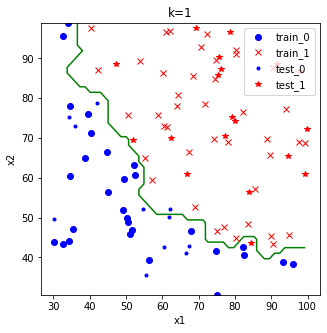

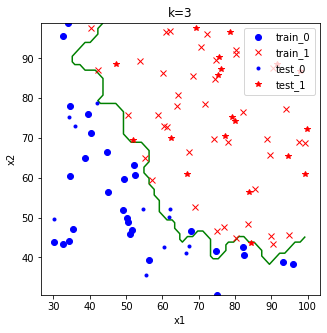

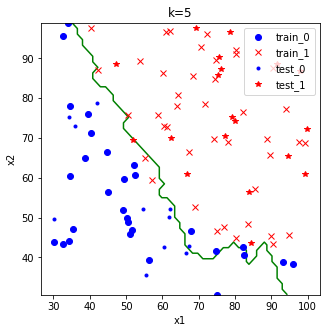

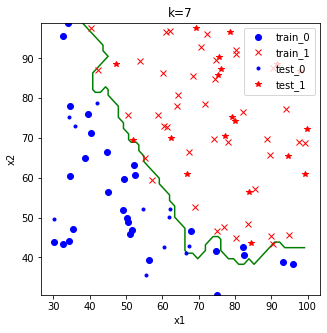

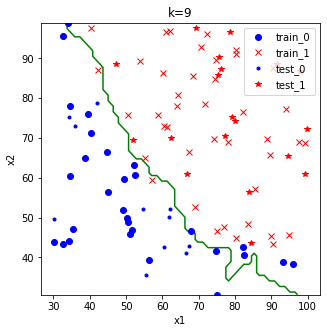

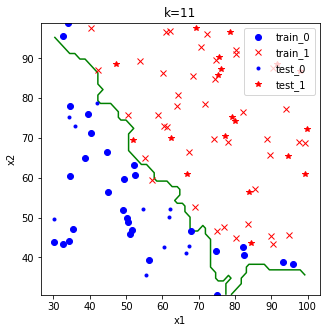

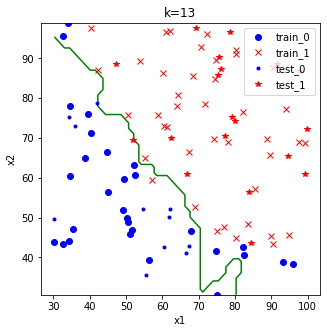

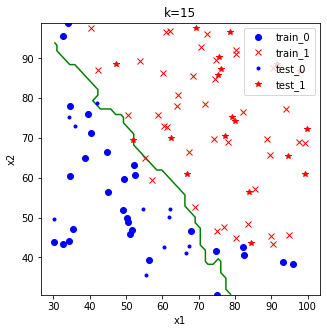

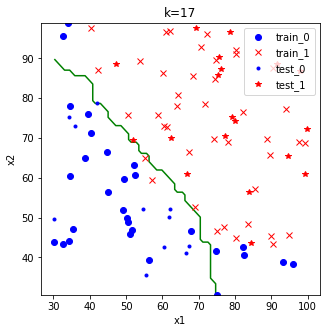

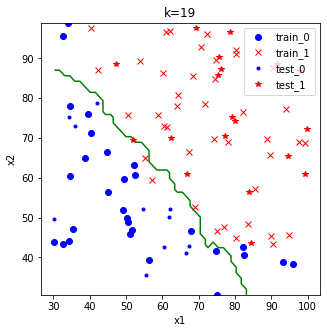

In [22]:
def classify(X, y, example, k):
    distances = []
    for i in range(len(X)):
        dist = np.linalg.norm(X[i] - example)
        distances.append((dist, y[i]))
    
    distances.sort(key=lambda x: x[0])
    nearest_neighbors = distances[:k]
    
    votes = [neighbor[1] for neighbor in nearest_neighbors]
    prediction = max(set(votes), key=votes.count)
    return prediction







for k in [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]:
    plt.figure(figsize=(5, 5))
    plt.title(f'k={k}')
    plt.xlabel('x1')
    plt.ylabel('x2')
    # prepare data for contour plot
    x1_res = 50
    x2_res = 50
    x1 = np.linspace(x_train[:, 0].min(), x_train[:, 0].max(), x1_res)
    x2 = np.linspace(x_train[:, 1].min(), x_train[:, 1].max(), x2_res)
    x1x1, x2x2 = np.meshgrid(x1, x2)
    x1x2_range_comb = np.c_[x1x1.ravel(), x2x2.ravel()]
    labels_space = np.zeros((x1_res, x2_res))
    for row_idx in range(x2_res):
        for col_idx in range(x1_res):
            example = np.array([x1[col_idx], x2[row_idx]])
            pred = classify(x_train, y_train, example, k)
            labels_space[row_idx, col_idx] = pred
    # plot decision boundary
    plt.contour(x1x1, x2x2, labels_space, levels=[0.5], colors='g')

    # plot training set
    plt.plot(x_train[y_train == 0, 0], x_train[y_train == 0, 1], 'bo')
    plt.plot(x_train[y_train == 1, 0], x_train[y_train == 1, 1], 'rx')

    # plot test set
    plt.plot(x_test[y_test == 0, 0], x_test[y_test == 0, 1], 'b.')
    plt.plot(x_test[y_test == 1, 0], x_test[y_test == 1, 1], 'r*')

    plt.legend(['train_0', 'train_1', 'test_0', 'test_1'])




In [23]:
k_best = 7  # Można wybrać wartość k na podstawie wykresu
y_test_pred = np.zeros(y_test.shape)
for example_idx, example in enumerate(x_test):
    pred = classify(x_train, y_train, example, k_best)
    y_test_pred[example_idx] = pred

# 5. Obliczanie czułości i pozytywnego przewidywania
cm = confusion_matrix(y_test, y_test_pred)
TP = cm[1, 1]  # True Positives
TN = cm[0, 0]  # True Negatives
FP = cm[0, 1]  # False Positives
FN = cm[1, 0]  # False Negatives

# Czułość (Se)
sensitivity = TP / (TP + FN)

# Pozytywne przewidywanie (PPV)
ppv = TP / (TP + FP)

# Wyświetlenie wyników
print(f"Accuracy for k={k_best}: {accuracy_score(y_test, y_test_pred):.4f}")
print(f"Sensitivity (Se) for k={k_best}: {sensitivity:.4f}")
print(f"Positive Predictive Value (PPV) for k={k_best}: {ppv:.4f}")

Accuracy for k=7: 0.9667
Sensitivity (Se) for k=7: 1.0000
Positive Predictive Value (PPV) for k=7: 0.9500


In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score, confusion_matrix

# 1. Wczytanie zbioru danych Digits
data = load_digits()
X_digits = data['data']
y_digits = data['target']

# 2. Podział na zbiór uczący i testowy
x_train, x_test, y_train, y_test = train_test_split(X_digits, y_digits, test_size=0.3, random_state=12345)

# 3. Użycie klasyfikatora KNN z scikit-learn
knn_classifier = KNeighborsClassifier(n_neighbors=7)
knn_classifier.fit(x_train, y_train)
y_pred = knn_classifier.predict(x_test)

# 4. Obliczanie czułości i pozytywnego przewidywania (w tym przypadku dla klasy '1' i '0')
cm = confusion_matrix(y_test, y_pred)
TP = cm[1, 1]  # True Positives
TN = cm[0, 0]  # True Negatives
FP = cm[0, 1]  # False Positives
FN = cm[1, 0]  # False Negatives

# Czułość (Se)
sensitivity = TP / (TP + FN)

# Pozytywne przewidywanie (PPV)
ppv = TP / (TP + FP)

# Wyświetlenie wyników
print(f"Accuracy for k=7 (scikit-learn): {accuracy_score(y_test, y_pred):.4f}")
print(f"Sensitivity (Se) for k=7 (scikit-learn): {sensitivity:.4f}")
print(f"Positive Predictive Value (PPV) for k=7 (scikit-learn): {ppv:.4f}")

Accuracy for k=7 (scikit-learn): 0.9907
Sensitivity (Se) for k=7 (scikit-learn): 1.0000
Positive Predictive Value (PPV) for k=7 (scikit-learn): 1.0000


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [26]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Załadowanie zbioru danych
data = load_digits()
X = data['data']
y = data['target']

# Podział na zbiór uczący i testowy
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definicja listy wartości k
k_values = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

# Zmienna do przechowania najlepszego modelu
best_k = None
best_accuracy = 0
best_model = None

# Testowanie modeli dla różnych wartości k
for k in k_values:
    # Tworzenie modelu KNN
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    
    # Trenowanie modelu
    knn_classifier.fit(x_train, y_train)
    
    # Predykcja na zbiorze testowym
    y_pred = knn_classifier.predict(x_test)
    
    # Obliczanie dokładności
    accuracy = np.mean(y_pred == y_test)
    
    # Zapisanie najlepszego modelu
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k
        best_model = knn_classifier

# Wybór najlepszego modelu
print(f'Najlepszy wynik osiągnięto dla k={best_k} z dokładnością {best_accuracy:.4f}')

# Obliczanie raportu klasyfikacji i macierzy konfuzji dla najlepszego modelu
y_pred_best = best_model.predict(x_test)

# Raport klasyfikacji
print("\nRaport klasyfikacji:")
print(classification_report(y_test, y_pred_best))

# Macierz konfuzji
print("\nMacierz konfuzji:")
print(confusion_matrix(y_test, y_pred_best))


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Najlepszy wynik osiągnięto dla k=5 z dokładnością 0.9926

Raport klasyfikacji:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        47
           3       0.98      1.00      0.99        54
           4       0.98      1.00      0.99        60
           5       0.98      0.98      0.98        66
           6       1.00      1.00      1.00        53
           7       1.00      1.00      1.00        55
           8       1.00      1.00      1.00        43
           9       0.98      0.95      0.97        59

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540


Macierz konfuzji:
[[53  0  0  0  0  0  0  0  0  0]
 [ 0 50  0  0  0  0  0  0  0  0]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  0 54  0  0  0  0  0  0]
 [ 0  0  0 

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim